<a href="https://colab.research.google.com/github/Crowbar97/DistributionSampler/blob/master/Sampler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from scipy.special import gamma
from scipy import optimize, integrate
from operator import add
from math import sqrt, pi, exp, log2
from functools import reduce
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'x-large',
          'xtick.labelsize': 'x-large',
          'ytick.labelsize': 'x-large'}
pylab.rcParams.update(params)

In [0]:
class Distribs:
    @staticmethod
    def get_uniform_points(count, left_bound=0, right_bound=1):
        return np.random.uniform(left_bound, right_bound, int(count))

    @staticmethod
    def some_density(x, mu=5):
      return 1 / (2 * sqrt(2 * pi)) * (exp(-(x - mu) ** 2 / 2) + exp(-(x + mu) ** 2 / 2))

In [0]:
class Plotter:
    @staticmethod
    def plot(fun, left_bound, right_bound, step):
        plt.figure()

        x = np.arange(left_bound, right_bound, step)
        y = list(map(fun, x))

        plt.plot(x, y, 'go-', label="y")

        plt.xlabel("x", fontsize=20)
        plt.ylabel("y", fontsize=20)
        plt.grid(True)
        plt.legend(loc=0, fontsize=20)

        plt.show()
        pass

    @staticmethod
    def plot_by_points(x, y):
        plt.figure()

        plt.plot(x, y, 'go-', label="y")

        plt.xlabel("x", fontsize=20)
        plt.ylabel("density", fontsize=20)
        plt.grid(True)
        plt.legend(loc=0, fontsize=20)

        plt.show()
        pass

In [0]:
class Parzen:
    @staticmethod
    def rect_kernel(z):
        return 0.5 * int(abs(z) < 1)

    @staticmethod
    def density(x, points, h):
        sum = 0
        for p in points:
            sum += Parzen.rect_kernel((x - p) / h)
        return 1 / (len(points) * h) * sum

    @staticmethod
    def estimate_density(distr_points, h, test_points):
        return list(map(lambda p: Parzen.density(p, distr_points, h),
                        test_points))

In [0]:
class Sampler:
    @staticmethod
    def sample(point, density):
        fun = lambda x: integrate.quad(density, -np.inf, x)[0] - point
        # Plotter.plot(fun, -10, 10, 0.1)
        # print(fun(100))
        x = optimize.bisect(fun, -10, 10)
        return x

In [0]:
Plotter.plot(Distribs.some_density, -10, 10, 0.1)

In [0]:
uniform_points = Distribs.get_uniform_points(1e4)
y = list(map(lambda uniform_point: Sampler.sample(uniform_point, Distribs.some_density), uniform_points))

In [0]:
x = np.arange(-10, 10, 0.1)
# est_dense = Parzen.estimate_density(y, 0.4, x)
# Plotter.plot_by_points(x, est_dense)

In [0]:
plt.hist(y, bins=200)
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


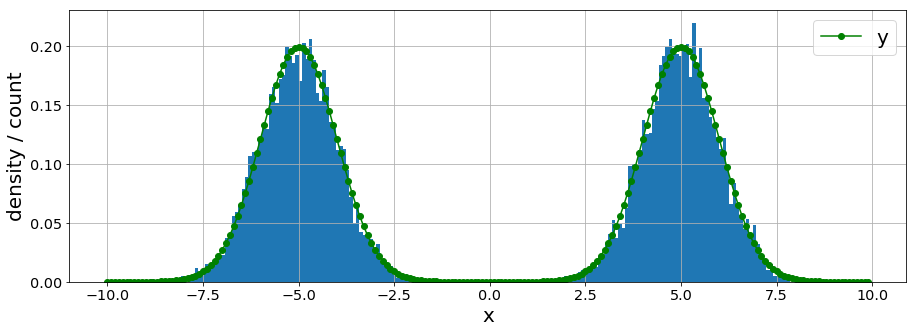

In [124]:
plt.plot(x, np.array(list(map(Distribs.some_density, x))), 'go-', label="y")
plt.hist(y, bins=200, normed=True)

plt.xlabel("x", fontsize=20)
plt.ylabel("density / count", fontsize=20)
plt.grid(True)
plt.legend(loc=0, fontsize=20)

plt.show()